Presentado por:

- Mendez Chipatecua, Eduards Alexis - Ciencias de la computación


#Punto 1

 El alfabeto de las terminales esta conformado por las palabras en minuscula y el de las no terminales por las sigientes abreviaciones en mayuscula:

1. O: Oracion
1. SJ: Sujeto
1. V: Verbo
1. CD: Complemento directo
1. CI: Complemento indirecto
1. CC: Complemento circunstancial
1. SU: Sujeto
1. A: Articulo
1. AD: Adjetivo
1. PP: Preposicion
1. AV: Adverbio
1. V: Verbo

---
- O →  SJ V CD CC| SJ V CD| SJ V CI CC
- SJ → SU | Alexis | Carlos | Pepito | Ignacio
- CD → PP A SU | PP A SU PP A SU | PP A SU PP SU AD
- CI → PP A SU | PP A SU AD| PP SU PP SU
- CC → PP A SU | PP A SU AD|AV| PP A SU PP A SU
- SU → casa | conejo | cama | esfero | computador | Alexis | Libro | Carlos | Pepito | Ignacio
- A → la | el | lo | las | los | un | uno | una | unas | unos | ε
- AD → grande | fuerte | triste | insomne | alegre | inmutable | ε
- PP → a | con | contra | de | desde | en | entre | hacia | sin | sobre | ε
- AV → bastante | lento | poco | frecuentemente | ayer | muy | ε
- V → caminar | camino | camina | caminaron | caminan | camine | caminaron

Está gramática es ambigua ya que:



> Pepito camina con Juan desde la casa



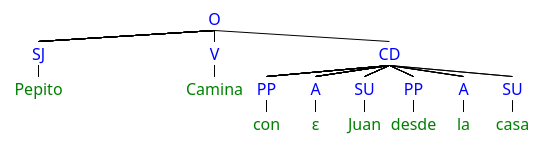

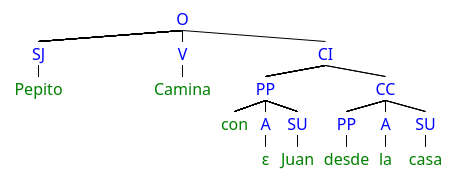

> De esto se deduced que es una grámatica ambigua, por lo tanto no es LL(1) ni LR(1).

# Punto 2
Considere la gramática

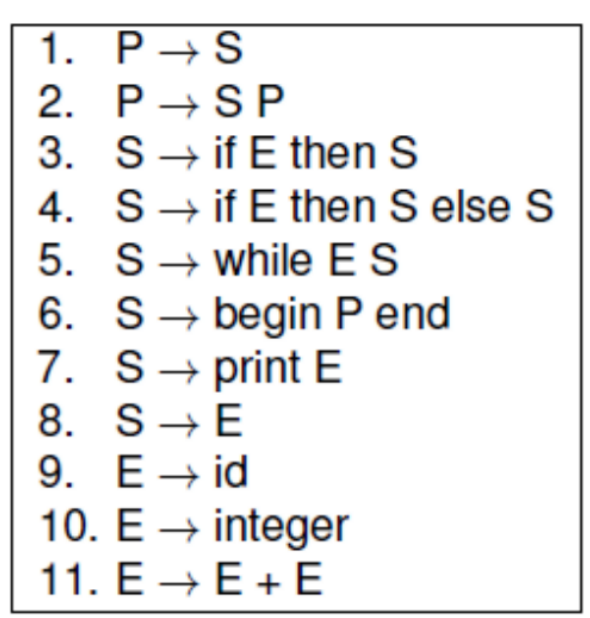

## Aspectos en los que $G$ no es $L1$

Tenemos que la siguiente cadena tiene dos derivaciones distinas:

***if id then if id then id else print id***

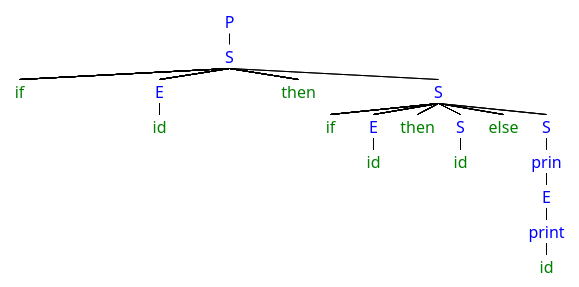

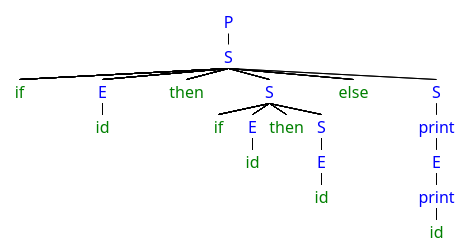

Por lo tanto la gramática es ambigua entonces no puede ser LL(1)

### 2. Gramatica equivalente

Eliminamos la recursión a izquierda de la producción:

$E \to E + E$

Remplazando la producciones e introduccion una nueva:

$E \to \texttt{id }E^* | \texttt{integer }E^*$

$E^* \to \epsilon | +E$

De igual forma eliminamos los prefijos comunes a la izquierda de las siguientes producciones:

$P \to S | SP$

$S \to \texttt{if } E \texttt{ then } S | \texttt{if } E \texttt{ then } S \texttt{ else } S$

Modificando las producciones las misma y añadiendo unas nuevas:

$S \to \texttt{if } E \texttt{ then } S \text{ }S^*$

$S^* \to \epsilon | \texttt{else } S $

$P \to S P^*$

$P^* \to \epsilon | P$

# Punto 3
Considere la gramática

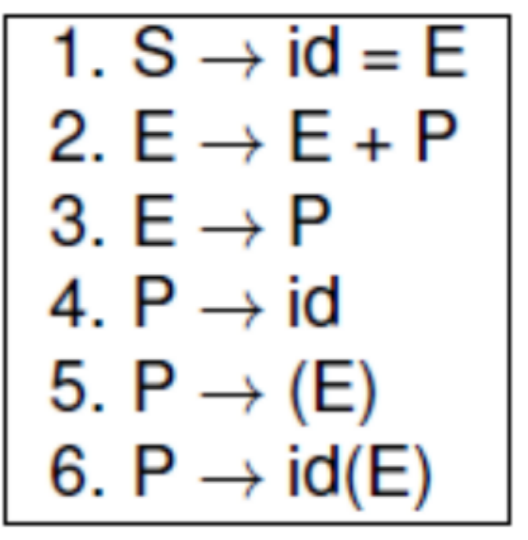

Conjuntos First:

$First(E) = \{\texttt{id}, \texttt{integer}\}$

$First(E^*) = \{\epsilon, +\}$

$First(S) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}\}$

$First(S^*) = \{\epsilon, \texttt{else} \}$

$First(P) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}\}$

$First(P^*) = \{\epsilon, \texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}\}$

---

Conjuntos Follow:

$Follow(E) = \{\texttt{then}, \texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, +, \$ \}$

$Follow(E^*) = \{\texttt{then}, \texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, +, \$ \}$

$Follow(S) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}, \texttt{end}, \$ \}$

$Follow(S^*) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}, \texttt{end}, \$ \}$

$Follow(P) = \{ \texttt{end}, \$ \}$

$Follow(P^*) = \{ \texttt{end}, \$ \}$

## **3. Gramatica LR**

![img](grammar3.png)

## 4 Escriba una gramática para representar el lenguaje JSON


***Escriba una gramática para representar el lenguaje JSON.
Escriba los first y los follow de la gramática
La gramática que usted escribió es LL(1), SLR o LR(1), o ninguna de ellas, explique.
Reescriba su gramática de la forma más simple posible.
Escriba una tabla de parse apropiada para la gramática***

1. J → { E }
2. E → E, E
3. E → "k": v
4. k → nombre | id
5. V → vanessa | claudio | 7894 | 2134

## First

- J → { 
- E → "
- k → nombre; id
- k → vanessa, caludio, 7894, 2134

## Follow

- J → $
- E → } ,
- K → "
- k → nombre | id
- V → , }

La gramatica no es LL(1) ya que tiene recursión a izquierda en la regla 2. Por otro lado, es LR(1) ya que podemos derivar cualquier cadena, con el metodo shift-reduce

| Stack             | Input                       | Action   |
|-------------------|-------------                |---------------|
|  | {"nombre": claudio, "id" :2134}\$| shift                     |
| {       |    "nombre": claudio, "id" :2134}\$|  shift           |
| {" | nombre": claudio, "id" :2134}\$                 | shift           | 
| {"nombre         | ": claudio, "id" :2134}\$ | reduce K->nombre        |
| {"k         | ": claudio, "id" :2134}\$ | shift, shift, shift          |
| {"k":claudio |  "pd":2134}  \$ | reduce v->claudio        |
| {"k":v |  "id":2134}  \$ | reduce E->"k":v        |
| {E |  "id":2134}  \$ | shift        |
| {E, "id |  ":2134}  \$ | reduce k-> id        |
| {E, "k  |  ":2134}  \$ | shift, shift, shift       |
| {E, "k", 2134 |  }  \$ | reduce v->2134        |
| {E, "k", v |  }  \$ | reduce E->"k";v        |
| {E, E,  |  }  \$ | reduce E->E, E        |
| {E  |  }  \$ | shift        |
| {E}  |    \$ | reduce J-> {E}        |
| J |  \$ | accept        |

# 5. Manual de Bison y grafos

***Consulte el manual de BISON y explique cómo se puede generar automáticamente el grafo asociado a la gramática, y genere los grafos asociados a las gramáticas de los puntos 2 y 3.***

Revisando en gnu.org/sofwrare/bison/manual/bison.pdf indican que para generar un grafo necesitamos de archivo con extensiñon .y donde este especifica todas las reglas de la gramatica.

- Comando --graph para generar un archivo .dot 
 dison example.y --graph

- optenemos dot -Tpng example.dot > output.png

De esta forma opteneos el grafo en formato pdf.

 ![img](grammar2.png)

![img](grammar3.png)